# Context

### While exploring the Aerial Bombing Operations of World War Two dataset, and recalling that the D-Day landings were nearly postponed due to poor weather, I sought out weather reports from the period to compare with missions in the bombing operations dataset.

# Content

### The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunderstorms or other poor weather conditions.

# Task

## Clean the data
### Is there a relationship between the daily minimum and maximum temperature?
### Can we predict the maximum temperature given the minimum temperature?

##### Explaination of data
##### 'STA'- Weather Station,
##### 'Date'- Date,
##### 'Precip'- Precipitation in mm,
##### 'WindGustSpd'- Peak wind gust speed in km/h,
##### 'MaxTemp'- Maximum temperature in degrees Celsius,
##### 'MinTemp'- Minimum temperature in degrees Celsius,
##### 'MeanTemp'- Mean temperature in degrees Celsius,
##### 'Snowfall'- Snowfall and Ice Pellets in mm, 
##### 'PoorWeather'- Repeat of TSHDSBRSGF,
##### 'YR'- Year, 
##### 'MO'- Month,
##### 'DA'- Date,
##### 'PRCP'- Precipation in inches , 
##### 'DR'- Peak wind gust direction in tens of degrees,
##### 'SPD'- Peak wind gust speed in knots,
##### 'MAX'- Maximum temperature in degrees Fahrenheit,
##### 'MIN'- Minimum temperature in degrees Fahrenheit,
##### 'MEA'- Mean temperature in degrees Fahrenheit,
##### 'SNF'- Snowfall in inches and tenths,
##### 'SND'- Snow depth (includes ice pellets) recorded at 1200 GMT except 0000 GMT in Far East Asian Area in inches and tenths, 
##### 'FT'- Frozen Ground Top (depth in inches),
##### 'FB'- Frozen Ground Base (depth in inches),
##### 'FTI'- Frozen Ground Thickness (thickness in inches),
##### 'ITH'- Ice Thickness on Water (inches and tenths),
##### 'PGT'- Peak wind gust time (hours and tenths), 
##### 'TSHDSBRSGF'- Day with: Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; 
#####                                                 Rain; Snow; Glaze; Fog; 0 = No, 1 = Yes,
##### 'SD3'- Snow depth at 0030 GMT includes ice pellets in inches and tenths,
##### 'RHX'- 24-hour maximum relative humidity, as a whole percent,
##### 'RHN'- 24-hour minimum relative humidity, as a whole percent,
##### 'RVG'- River guage in feet and tenths,
##### 'WTE'-Water equivalent of snow and ice on ground in inches and hundredths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data=pd.read_csv('Summary of Weather.csv')

C:\Users\Ajay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [5]:
data_no_null=raw_data.dropna(how='all',axis=1)

In [6]:
data_no_null

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,PGT,TSHDSBRSGF
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,0.39,NaN,NaN,85.0,65.0,75.0,0,NaN,NaN,1
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,1
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,0,NaN,NaN,83.0,65.0,74.0,0,NaN,NaN,NaN


In [7]:
data_no_null.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
PGT            118515
TSHDSBRSGF      84803
dtype: int64

In [8]:
# I am dropping variables which are more missing more than 100000 and are a copy of another column
data_no_null.drop(['WindGustSpd','DR','SPD','SND','PGT','PRCP','MAX','MIN','MEA','Snowfall','TSHDSBRSGF'],axis=1,inplace=True)

C:\Users\Ajay\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data_no_null.dtypes

STA              int64
Date            object
Precip          object
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
PoorWeather     object
YR               int64
MO               int64
DA               int64
SNF             object
dtype: object

In [10]:
data_no_null.isnull().sum()

STA                0
Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
PoorWeather    84803
YR                 0
MO                 0
DA                 0
SNF             1163
dtype: int64

In [11]:
data_no_null['PoorWeather'].fillna(data_no_null['PoorWeather'].mode()[0],inplace=True)
data_no_null['PoorWeather'].replace({'1':1.0,'1.0':1.0},inplace=True)

C:\Users\Ajay\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Ajay\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
import seaborn as sns

In [13]:
data_no_null.dtypes

STA              int64
Date            object
Precip          object
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
PoorWeather     object
YR               int64
MO               int64
DA               int64
SNF             object
dtype: object

In [14]:
data_no_null["Precip"].value_counts()

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
83.566         1
139.954        1
91.186         1
132.842        1
80.772         1
Name: Precip, Length: 540, dtype: int64

In [15]:
data_no_null['Precip'].replace({'0':0.0,'T':1.0},inplace=True)

for i in range(len(data_no_null)):
    if data_no_null['Precip'][i]!=0.0:
        data_no_null['Precip'][i]='others'
data_no_null['Precip'].replace({'others':1.0},inplace=True)


C:\Users\Ajay\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ajay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
data_no_null['Precip'].value_counts()

0.0    64267
1.0    54773
Name: Precip, dtype: int64

In [17]:
for i in range(len(data_no_null)):
    if data_no_null['PoorWeather'][i]!=1.0:
        data_no_null['PoorWeather'][i]='others'
    

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data_no_null['PoorWeather'].replace({'others':0.0},inplace=True)

In [19]:
data_no_null['SNF'].replace({'0.0':0.0,'0':0.0,'T':0.1},inplace=True)


In [20]:
for i in range(len(data_no_null)):
    if data_no_null['SNF'][i]!=0.0:
        data_no_null['SNF'][i]='others'

data_no_null['SNF'].replace({'others':1.0},inplace=True)

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
data_no_null.dtypes

STA              int64
Date            object
Precip         float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
PoorWeather    float64
YR               int64
MO               int64
DA               int64
SNF            float64
dtype: object

In [22]:
data_no_null['SNF'].value_counts()

0.0    115690
1.0      3350
Name: SNF, dtype: int64

In [23]:
column=list(data_no_null.columns)
for i in column:
    print('----------------------------------------')
    print(i)
    print(data_no_null[i].value_counts())
    print(' ')

----------------------------------------
STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
         ... 
42206      50
33123      47
43307      46
34101      31
33121      13
Name: STA, Length: 159, dtype: int64
 
----------------------------------------
Date
1945-4-20    122
1945-4-22    122
1945-4-17    122
1945-4-24    122
1945-4-26    122
            ... 
1940-1-3       3
1940-1-12      3
1940-1-7       3
1940-1-27      3
1940-1-26      3
Name: Date, Length: 2192, dtype: int64
 
----------------------------------------
Precip
0.0    64267
1.0    54773
Name: Precip, dtype: int64
 
----------------------------------------
MaxTemp
 30.000000    8337
 31.111111    7688
 29.444444    7447
 30.555556    7366
 28.888889    6335
              ... 
-33.333333       1
-31.666667       1
-31.111111       1
-26.666667       1
 49.444444       1
Name: MaxTemp, Length: 149, dtype: int64
 
----------------------------------------
MinTemp
 22.222222    8704
 23.333333    83

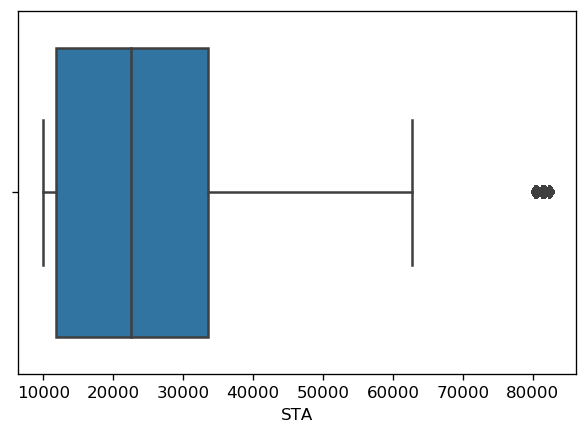

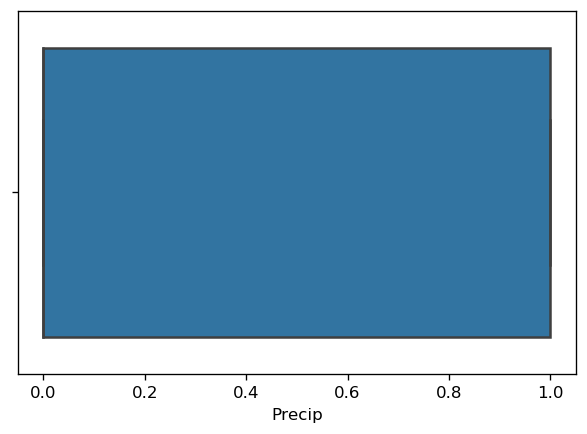

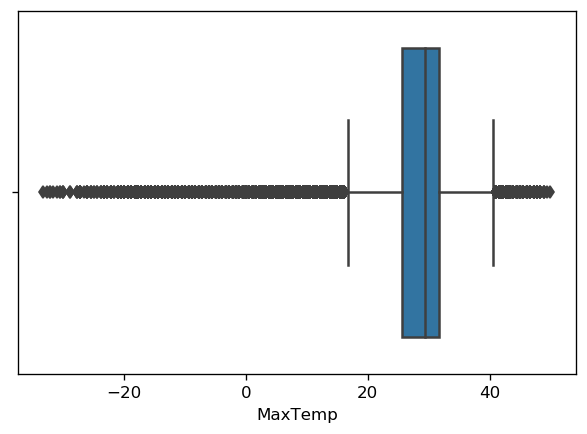

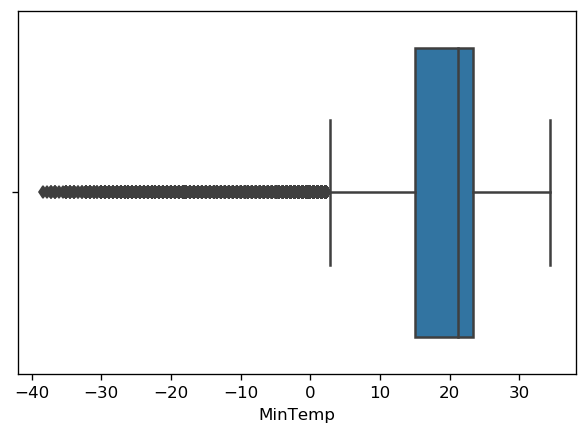

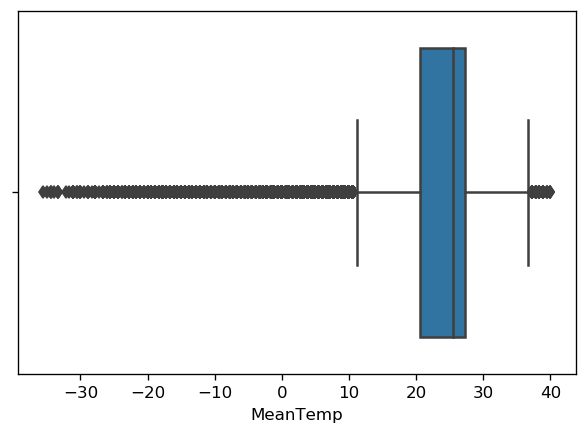

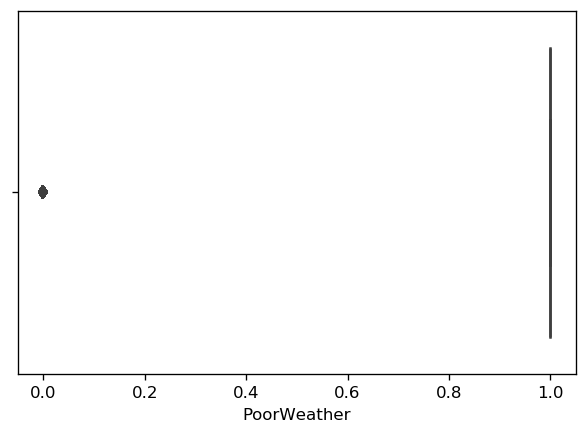

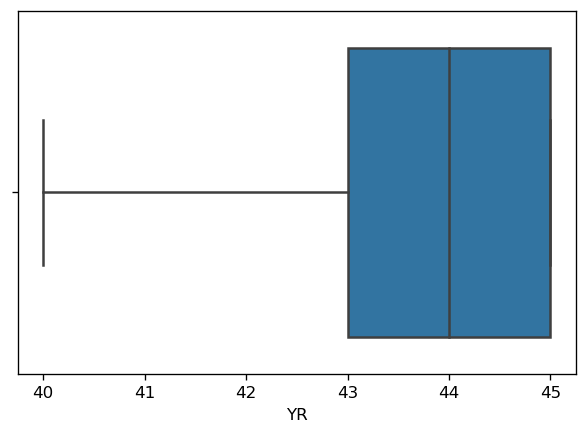

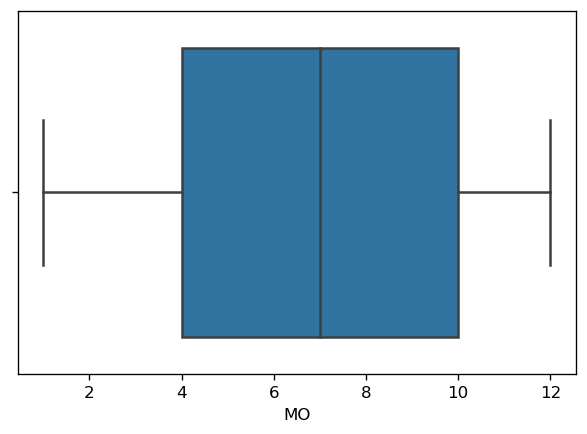

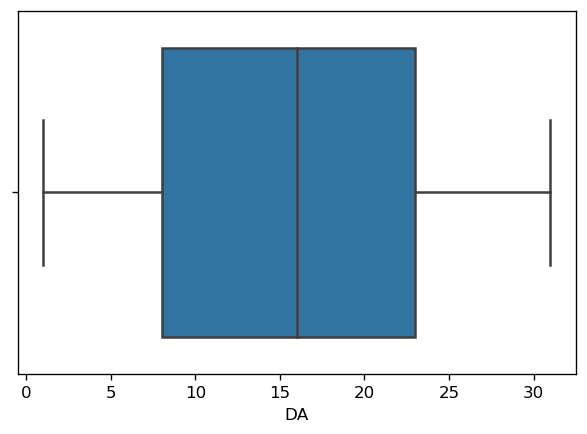

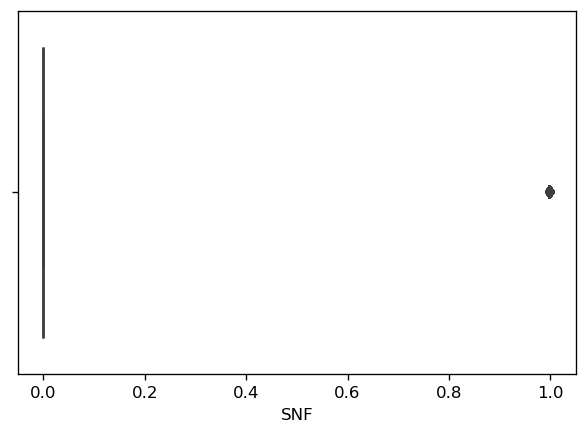

In [24]:
column=list(data_no_null.columns)

column.remove('Date')

for i in column:
    fig=plt.figure(figsize=(6,4),dpi=120)
    sns.boxplot(x=data_no_null[i])
# Value above 40 and below 20 are considered to be outliers

### We have cleaned the data above, now we move onto the process of comparing the minimum and maximum temperature and find a correlation

In [25]:
data=data_no_null.copy()

In [26]:
data

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,PoorWeather,YR,MO,DA,SNF
0,10001,1942-7-1,1.0,25.555556,22.222222,23.888889,1.0,42,7,1,0.0
1,10001,1942-7-2,0.0,28.888889,21.666667,25.555556,1.0,42,7,2,0.0
2,10001,1942-7-3,1.0,26.111111,22.222222,24.444444,1.0,42,7,3,0.0
3,10001,1942-7-4,1.0,26.666667,22.222222,24.444444,1.0,42,7,4,0.0
4,10001,1942-7-5,0.0,26.666667,21.666667,24.444444,1.0,42,7,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0.0,28.333333,18.333333,23.333333,1.0,45,12,27,0.0
119036,82506,1945-12-28,1.0,29.444444,18.333333,23.888889,1.0,45,12,28,0.0
119037,82506,1945-12-29,0.0,28.333333,18.333333,23.333333,1.0,45,12,29,0.0
119038,82506,1945-12-30,0.0,28.333333,18.333333,23.333333,1.0,45,12,30,0.0


In [27]:
data['MinTemp'].corr(data['MaxTemp'])
# High Positive Correlation

0.8783839059497572

Text(0.5, 1.0, 'A Scatter Plot Between Max and Min Temperature')

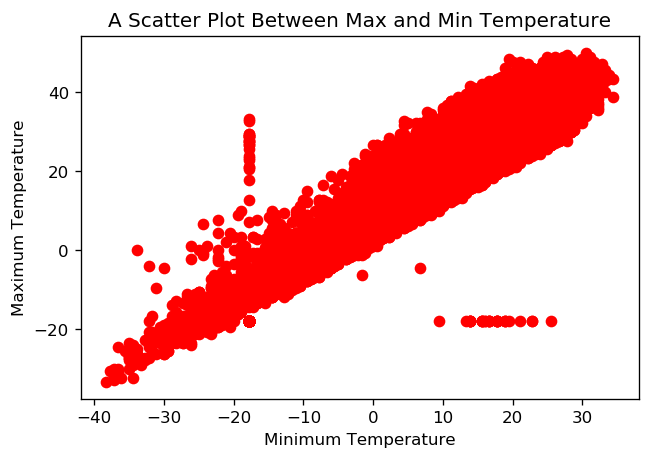

In [28]:
plt.figure(figsize=(6,4),dpi=120)
plt.scatter(data['MinTemp'],data['MaxTemp'],color='Red')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('A Scatter Plot Between Max and Min Temperature')

# We can see that the relation looks like a linear one. Let's find out whether we can find Maximum temperature using the Minimum Temperature

In [29]:
new_data=data.sample(frac=1).reset_index(drop=True)
# Shuffling the data 
data['MinTemp'].shape,data['MaxTemp'].shape
# We see that the data is 1-D so we change it to 2-D because Scikit Learn doesn't take 1-D values.

((119040,), (119040,))

In [30]:
# Variable Identification
x=new_data['MinTemp'].values.reshape(-1,1)
y=new_data['MaxTemp'].values.reshape(-1,1)
# -1 in the parameters is used to readjust the size of the dimension depending on the axis, so for this example it is x
# and you can only use -1 for one axis.

In [31]:
x.shape,y.shape

((119040, 1), (119040, 1))

In [32]:
# Splitting the data
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=10,test_size=.25)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [34]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
test_predict=lr.predict(test_x)
k=r2_score(test_y,test_predict)
k

0.7789988849710652

In [39]:
train_predict=lr.predict(train_x)
a=r2_score(train_y,train_predict)
a

0.7689985124926433

Text(0.5, 1.0, 'A Scatter Plot Between Max and Min Temperature')

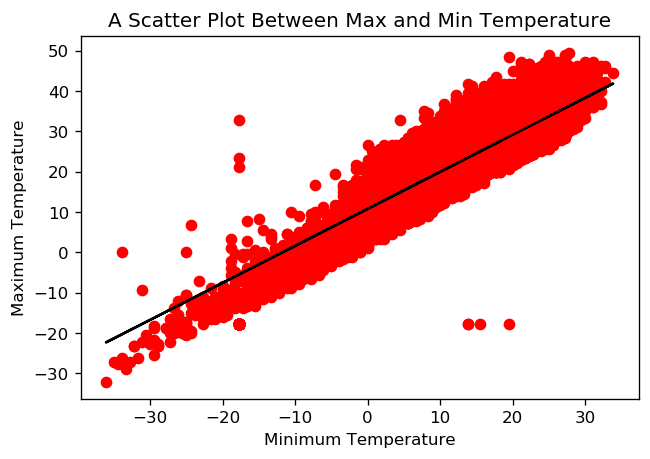

In [40]:
plt.figure(figsize=(6,4),dpi=120)
plt.scatter(test_x,test_y,color='Red')
plt.plot(test_x,test_predict,color='black')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('A Scatter Plot Between Max and Min Temperature')